In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## SVC

In [2]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000, n_features=2, n_classes= 2, n_clusters_per_class=2, n_redundant=0)

In [3]:
x

array([[-0.49615512, -0.17674737],
       [ 0.87881846,  1.2099649 ],
       [-0.88829774,  0.7102149 ],
       ...,
       [ 1.66067873,  0.13889334],
       [ 0.57479974,  0.5677347 ],
       [-0.90470888,  0.79616713]])

In [4]:
y

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,

### to check if features are overlapping or not?

<Axes: xlabel='0', ylabel='1'>

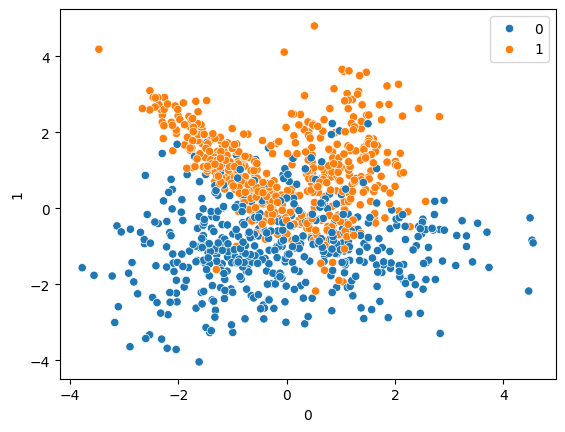

In [5]:
sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue = y)

In [6]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [7]:
x_train.shape

(700, 2)

In [8]:
x_test.shape

(300, 2)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [10]:
classifier.coef_

array([[0.08840399, 1.15827461]])

In [11]:
y_pred =classifier.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       137
           1       0.88      0.82      0.85       163

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [13]:
print(confusion_matrix(y_test, y_pred))

[[118  19]
 [ 29 134]]


In [14]:
print(accuracy_score(y_test, y_pred))

0.84


In [15]:
from sklearn.model_selection import GridSearchCV
params = {'C': [1,2,4,6,8,12,10,40],
          'gamma': [0.2,0.4,1,0.001,0.003],
          'kernel':['linear']
          }

In [16]:
grid = GridSearchCV(SVC(), param_grid=params, cv = 5, verbose=3)
# verbose gives you intermediate results

In [17]:
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 4, 6, 8, 12, 10, 40],
                         'gamma': [0.2, 0.4, 1, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [18]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.829 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.850 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.814 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.829 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.771 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.829 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.850 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.814 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.829 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.771 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.829 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 4, 6, 8, 12, 10, 40],
                         'gamma': [0.2, 0.4, 1, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [19]:
grid.best_params_

{'C': 12, 'gamma': 0.2, 'kernel': 'linear'}

In [20]:
grid.best_score_

np.float64(0.8200000000000001)

# **SVR**

In [21]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=1000, n_features= 2, noise = 0.3, n_targets = 1)
# n_targets = num of targets or y columns
# noise = outliers added into the dataset

In [22]:
x

array([[ 0.3970053 , -0.35356617],
       [-0.50481787, -1.03057969],
       [-0.41069067,  2.13127043],
       ...,
       [ 0.43802594,  0.89179032],
       [ 0.6070443 , -1.05045196],
       [ 1.09922328,  3.06171745]])

In [23]:
y

array([-1.82971844e+01, -7.59516078e+01,  1.36426462e+02, -2.70911373e+01,
        5.11218106e+01, -1.43028282e+02,  2.36632541e+01, -1.46329254e+01,
        1.16759544e+01,  4.69605118e+01, -1.06660857e+02,  3.38923580e+01,
        1.43419449e+02,  1.98335285e+00, -1.79429308e+02,  4.30146164e+01,
       -7.41834924e+01, -1.55445083e+01, -7.03588215e+01,  1.91461369e+01,
        2.10238728e+01,  2.33021017e+01, -5.87941621e+01,  4.95459819e+01,
       -1.12683691e+01,  4.99004592e+00, -6.53222590e+01,  1.67109929e+02,
        6.30108473e+01,  1.29865247e+02,  2.04788900e+01, -1.24227214e+02,
       -5.78247001e+00,  6.62094583e+01,  1.45174564e+01, -2.33460493e+01,
        3.03350682e+01, -6.74320728e+00, -5.29786766e+01,  4.60931596e+01,
        4.93567594e+01, -4.02329739e+01, -6.08825223e+01, -1.51953334e+02,
        8.76059745e+01,  3.83643329e+01,  5.33522063e+01, -8.01674089e+01,
        1.08478153e+01, -6.21698528e+01,  7.65919451e+01,  7.17585682e+01,
        6.84924402e+01,  

<Axes: xlabel='0', ylabel='1'>

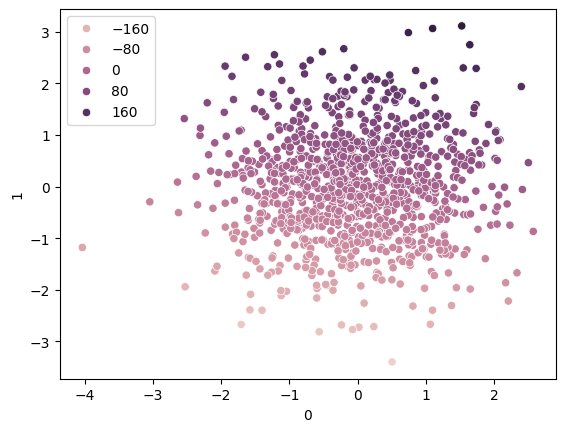

In [24]:
sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue=y)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [26]:
from sklearn.svm import SVR
model = SVR(kernel='linear')

In [27]:
model.fit(x_train, y_train)

SVR(kernel='linear')

In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999781181043099

In [30]:
from sklearn.model_selection import GridSearchCV
params = {'C':[1,2,4,10,50,100],
          'gamma':[0.1,0.2,0.4,0.003,0.001],
          'kernel':['linear'],
          'epsilon':[0.1, 0.001, 0.2,0.3]
          }
clf = GridSearchCV(SVR(), param_grid=params, cv = 5, verbose=3)
clf.fit(x_train, y_train)
clf.predict(x_test)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.4, kerne

array([ 121.93048413,   53.06147713,  -35.14524153,   50.54729482,
        -26.20115546,  -87.86751335,  -69.77230793, -117.793876  ,
         37.48041615,  -61.76429604,   45.59768748,   27.54199922,
         29.1329376 ,  -71.34614173,  -63.57194351,  -14.61467467,
         29.75980989,   23.32108466, -117.12222798,  -86.82137342,
        -44.62381541,   81.85184945, -110.47322929,   -8.5054615 ,
        -14.10122532,  -78.36622999,   70.2023334 ,  -87.59641681,
        -36.72089285, -181.36416902,  -64.64975497,   38.29138795,
         23.16065863,  -79.95806256, -117.17817795,   86.26245984,
        -67.92706742,  104.63000582,   68.95427407,   96.05094042,
        -68.13801355,  -23.38827305,   38.22890393,   16.59624583,
          0.62509041,   16.2570378 ,   44.12100819,  -40.18962033,
        -49.67496418,  -58.84109295,  -16.43406866,   14.88088238,
         53.94606266,  -23.71075996,   18.37951546,  -79.52961995,
        -63.40637787,  209.21760892,   79.52602697,  -22.95746

In [31]:
clf.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 0.1, 'kernel': 'linear'}

In [32]:
clf.best_score_

np.float64(0.9999817208253585)

# **SV Kernel**

In [106]:
x = np.linspace(-6,6,100)
y = np.sqrt((10**2) -(x**2))
y = np.hstack([y,-y])
x = np.hstack([x, -x])

In [107]:
x1 = np.linspace(-6,6,100)
y1 = np.sqrt((4**2) -(x1**2))
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1, -x1])

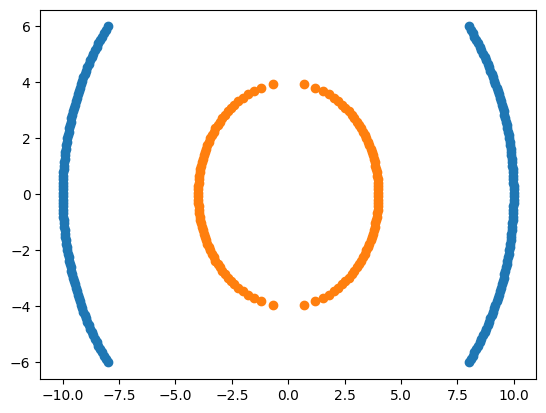

In [108]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [109]:
df1 = pd.DataFrame(np.vstack([x,y]).T, columns = ['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([x1,y1]).T, columns = ['X1','X2'])
df2['Y'] = 1 
df = pd.concat([df1,df2], ignore_index=True)
df.head()

,X1,X2,Y
0,-6.000000,8.000000,0
1,-5.878788,8.089490,0
2,-5.757576,8.176205,0
3,-5.636364,8.260230,0
4,-5.515152,8.341649,0


In [110]:
df.isna().value_counts()

X1     X2     Y    
False  False  False    332
       True   False     68
Name: count, dtype: int64

In [111]:
# df.dropna(inplace=True)
# df.isna().value_counts()

In [112]:
df1 = df.copy()
df1.head()


,X1,X2,Y
0,-6.000000,8.000000,0
1,-5.878788,8.089490,0
2,-5.757576,8.176205,0
3,-5.636364,8.260230,0
4,-5.515152,8.341649,0


In [113]:
df1['x1square'] = df1['X1']**2
df1['x2square'] = df1['X2']**2
df1['x1x2'] = df1['X1']*df1['X2']

In [114]:
df1.head()

,X1,X2,Y,x1square,x2square,x1x2
0,-6.000000,8.000000,0,36.000000,64.000000,-48.000000
1,-5.878788,8.089490,0,34.560147,65.439853,-47.556397
2,-5.757576,8.176205,0,33.149679,66.850321,-47.075117
3,-5.636364,8.260230,0,31.768595,68.231405,-46.557662
4,-5.515152,8.341649,0,30.416896,69.583104,-46.005457


In [115]:
df1.dropna(inplace=True)
x = df1[['x1square','x2square','x1x2']]
y = df1['Y']

In [116]:
x.shape

(332, 3)

In [117]:
len(y)

332

In [118]:

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [119]:
import plotly.express as px

In [120]:
fig = px.scatter_3d(df1, x = 'x1square', y='x2square', z = 'x1x2', color = 'Y')
fig.show()

In [121]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [103]:
X = df1[['X1','X2']]
Y = df1['Y']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [104]:
X = df1[['X1','X2']]
Y = df1['Y']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
model = SVC(kernel='poly')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.62

In [105]:
X = df1[['X1','X2']]
Y = df1['Y']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.62